In [9]:
import pandas as pd
data = pd.read_excel("/Users/spencerlove/Library/CloudStorage/OneDrive-TheUniversityofWesternOntario/MFE_Python/MFEcodonomics/Data/SCFHouseholdData_2022.xlsx")
data

,Age,TotalIncome,TotalAssets,TotalDebt,StocksDirect,StocksRetire,Entrepreneur
0,70,35900,957100.0,195000,0,49000.0,0
1,70,35400,1067300.0,213000,0,177000.0,0
2,70,33400,957200.0,279000,0,42500.0,0
3,70,31000,828600.0,549000,0,42000.0,0
4,70,32900,825600.0,223000,0,27000.0,0
...,...,...,...,...,...,...,...
22970,40,36000,0.0,0,0,0.0,0
22971,40,31000,0.0,0,0,0.0,0
22972,40,36000,0.0,0,0,0.0,0
22973,40,36000,0.0,0,0,0.0,0


In [10]:
mean_debt = data["TotalDebt"].mean()
mean_debt

360642.9331882481

In [11]:
above_mean = data[data['TotalDebt'] > mean_debt].copy()
print(f"Rows Above Mean Debt:", len(above_mean))

below_mean = data[data['TotalDebt'] < mean_debt].copy()
print(f"Rows Below Mean Debt:", len(below_mean))

Rows Above Mean Debt: 3715
Rows Below Mean Debt: 19260


In [12]:
above_mean['Stocks/Assets'] = above_mean['StocksDirect'] / above_mean['TotalAssets']
above_mean['All_Stocks/Assets'] = (above_mean['StocksDirect'] + above_mean['StocksRetire']) / above_mean['TotalAssets']

below_mean['Stocks/Assets'] = below_mean['StocksDirect'] / below_mean['TotalAssets']
below_mean['All_Stocks/Assets'] = (below_mean['StocksDirect'] + below_mean['StocksRetire']) / below_mean['TotalAssets']

In [13]:
below_mean = below_mean.fillna(0)
above_mean = above_mean.fillna(0)

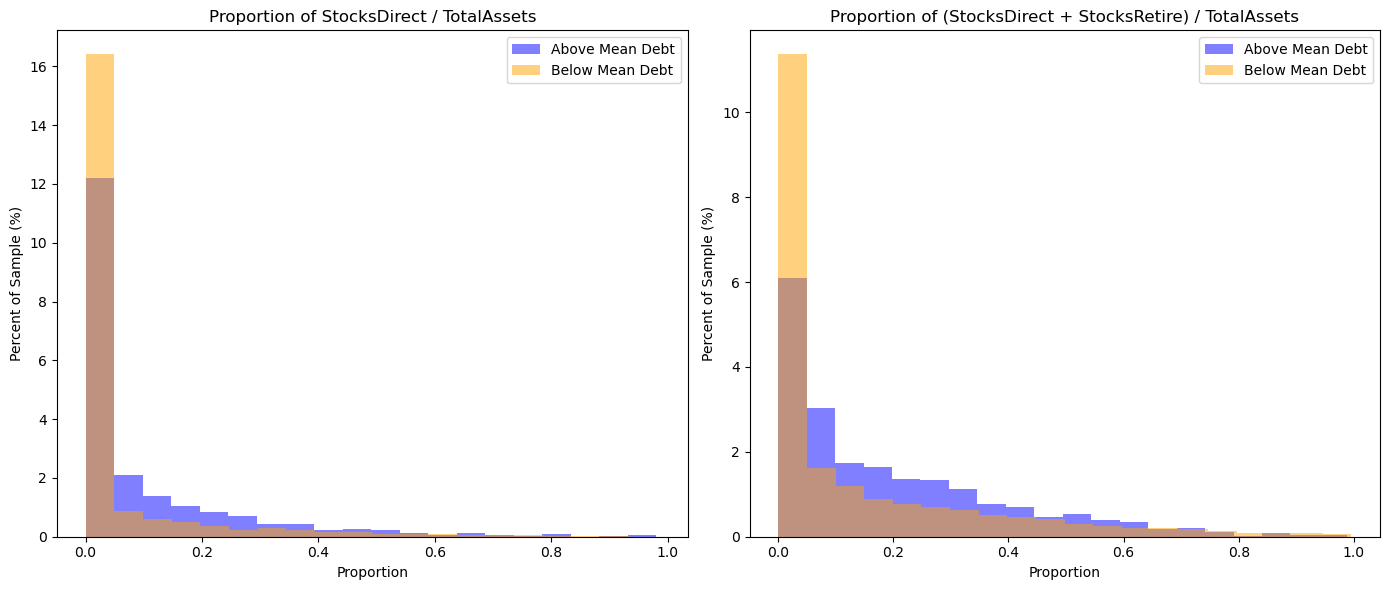

In [17]:
import matplotlib.pyplot as plt

# Plot histograms comparing the proportions
plt.figure(figsize=(14, 6))

# Proportion 1 Histogram
plt.subplot(1, 2, 1)
plt.hist(above_mean['Stocks/Assets'], bins=20, alpha=0.5, label='Above Mean Debt', color='blue', density=True)
plt.hist(below_mean['Stocks/Assets'], bins=20, alpha=0.5, label='Below Mean Debt', color='orange', density=True)
plt.title('Proportion of StocksDirect / TotalAssets')
plt.xlabel('Proportion')
plt.ylabel('Percent of Sample (%)')
plt.legend()

# Proportion 2 Histogram
plt.subplot(1, 2, 2)
plt.hist(above_mean['All_Stocks/Assets'], bins=20, alpha=0.5, label='Above Mean Debt', color='blue', density=True)
plt.hist(below_mean['All_Stocks/Assets'], bins=20, alpha=0.5, label='Below Mean Debt', color='orange', density=True)
plt.title('Proportion of (StocksDirect + StocksRetire) / TotalAssets')
plt.xlabel('Proportion')
plt.ylabel('Percent of Sample (%)')
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
import statsmodels.api as sm

# Create a binary variable for Above/Below Mean Debt
above_mean['DebtCategory'] = 1  # 1 for Above Mean Debt
below_mean['DebtCategory'] = 0  # 0 for Below Mean Debt

# Combine the two datasets
data = pd.concat([above_mean, below_mean])

# Define the dependent variable (y) and independent variables (X)
y = data['All_Stocks/Assets']  # Dependent variable
X = data[['DebtCategory', 'TotalDebt']]  # Independent variables

# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      All_Stocks/Assets   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           9.42e-57
Time:                        10:21:16   Log-Likelihood:                 4054.4
No. Observations:               22975   AIC:                            -8103.
Df Residuals:                   22972   BIC:                            -8079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1329      0.001     90.927   